## 3.1 Korrelation in Signalen
Unser DJ möchte herausfinden, wo in der griechischen Nationalhymne der Reffrain ist. Dazu wird er die Auto-Korrelation des Signals berechnen.

In [1]:
from IPython.display import Audio
from IPython.display import display

display(Audio('gr.mp3', autoplay=False))

In [20]:
import cv2 as cv
from enum import Enum
from ipywidgets import interact, widgets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import morphology
from scipy import signal
from scipy import datasets
import statsmodels.api as sm

In [10]:
weather = pd.read_csv('Temps.csv', sep=';', decimal=',')
weather['Datum'] = pd.to_datetime(weather['Datum'], dayfirst=True)
weather.head()

,Datum,Wochentag,Tagestemperatur,Nachttemperatur
0,2023-05-01,Mon,22,15
1,2023-05-02,Tue,21,14
2,2023-05-03,Wed,25,14
3,2023-05-04,Thu,23,16
4,2023-05-05,Fri,20,16


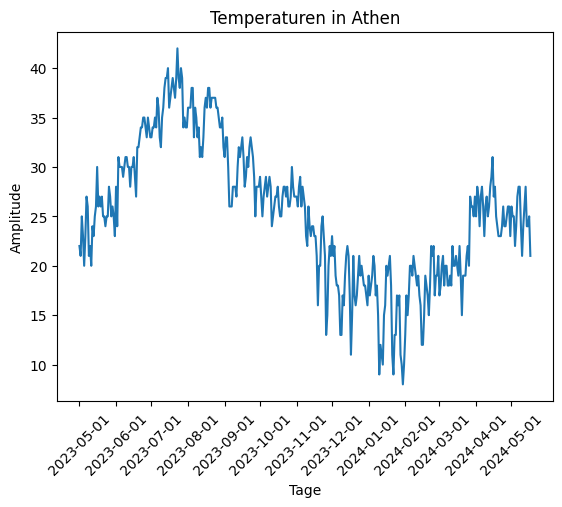

In [11]:
plt.plot(weather['Datum'], weather['Tagestemperatur'])
plt.title('Temperaturen in Athen')
plt.xlabel('Tage')
plt.ylabel('Amplitude')

selected_dates = pd.to_datetime(['2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01'])
plt.xticks(selected_dates, selected_dates.strftime('%Y-%m-%d'), rotation=45)

plt.show()

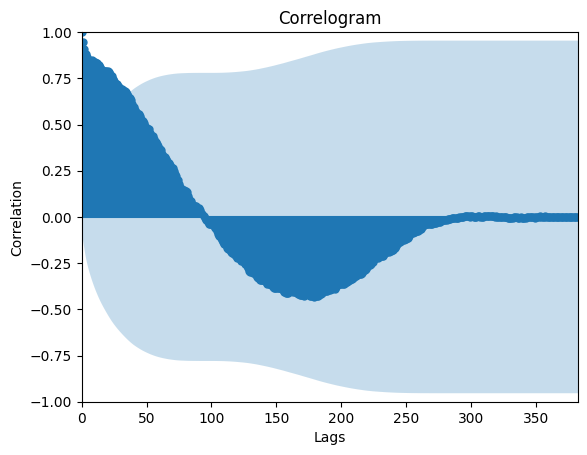

In [12]:
lags = len(weather) -1

sm.graphics.tsa.plot_acf(weather["Tagestemperatur"], lags=lags, title="Correlogram")
plt.xlabel("Lags")
plt.ylabel("Correlation")
plt.xlim(0, lags)
plt.show()

Hohe Anfangskorrelation:

Am Lag 0 ist die Autokorrelation immer 1, da ein Wert mit sich selbst perfekt korreliert ist.
Die Autokorrelation bleibt bei den ersten Lags hoch (zwischen 0 und 50), was darauf hindeutet, dass aufeinanderfolgende Tage ähnliche Temperaturen haben. Dies ist typisch für Temperaturdaten, da das Wetter an aufeinanderfolgenden Tagen oft ähnlich ist.

Abnehmende Korrelation:
Die Autokorrelation nimmt mit zunehmendem Lag kontinuierlich ab. Dies bedeutet, dass der Zusammenhang zwischen den Temperaturen mit der Zeit schwächer wird.

Negative Korrelation:
Zwischen Lag 50 und Lag 150 zeigt die Autokorrelation negative Werte, was auf eine mögliche saisonale Komponente hinweist. In diesem Fall könnte es bedeuten, dass die Temperaturen nach etwa 50 Tagen entgegengesetzt korreliert sind, was auf eine jährliche saisonale Schwankung hinweisen könnte.

Rückkehr zu Null:
Ab etwa Lag 150 beginnen die Autokorrelationen wieder zu steigen und nähern sich Null an. Dies deutet darauf hin, dass die Temperaturwerte über längere Zeiträume hinweg keine starke Korrelation mehr aufweisen.

Saisonale Muster:
Die deutliche negative Korrelation und das Muster der Rückkehr zu Null deuten auf eine saisonale Komponente hin. Bei Wetterdaten ist dies oft durch Jahreszeiten bedingt, was bedeutet, dass ähnliche Temperaturniveaus nach einem Jahr wiederkehren könnten.

### Kreuzkorrelation von Temperaturdaten

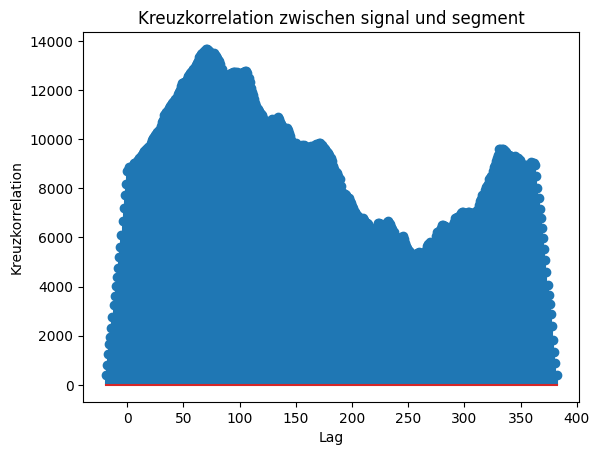

Der beste Lag ist: 70


In [19]:
x_daten = weather["Tagestemperatur"]
y_daten = weather["Nachttemperatur"][150:170]

cross_corr = np.correlate(x_daten, y_daten, mode='full')

lags = np.arange(-len(y_daten) + 1, len(x_daten))

# Plotten der Kreuzkorrelation
plt.stem(lags, cross_corr)
plt.xlabel('Lag')
plt.ylabel('Kreuzkorrelation')
plt.title('Kreuzkorrelation zwischen signal und segment')
plt.show()

# Den Lag mit der höchsten Kreuzkorrelation finden
max_corr_index = np.argmax(cross_corr)
best_lag = lags[max_corr_index]
print("Der beste Lag ist:", best_lag)

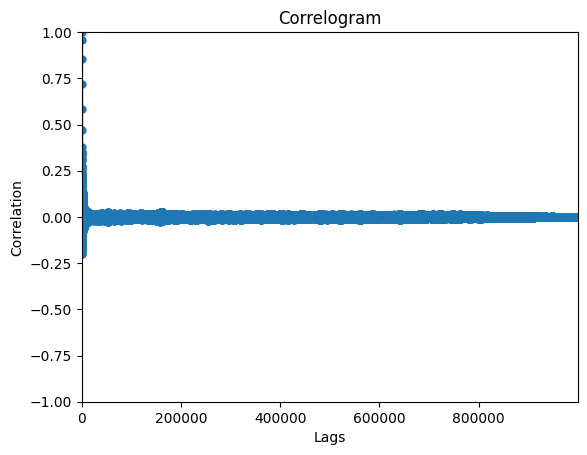

In [16]:
import librosa

y, sr = librosa.load('gr.mp3', sr=22050)

y_short = y[:1000000]
lags = len(y_short) -1

sm.graphics.tsa.plot_acf(y_short, lags=lags, title="Correlogram")
plt.xlabel("Lags")
plt.ylabel("Correlation")
plt.xlim(0, lags)
plt.show()

## 3.2 Segmentierung, morphologische Operationen und Objekteigenschaften in Bildern

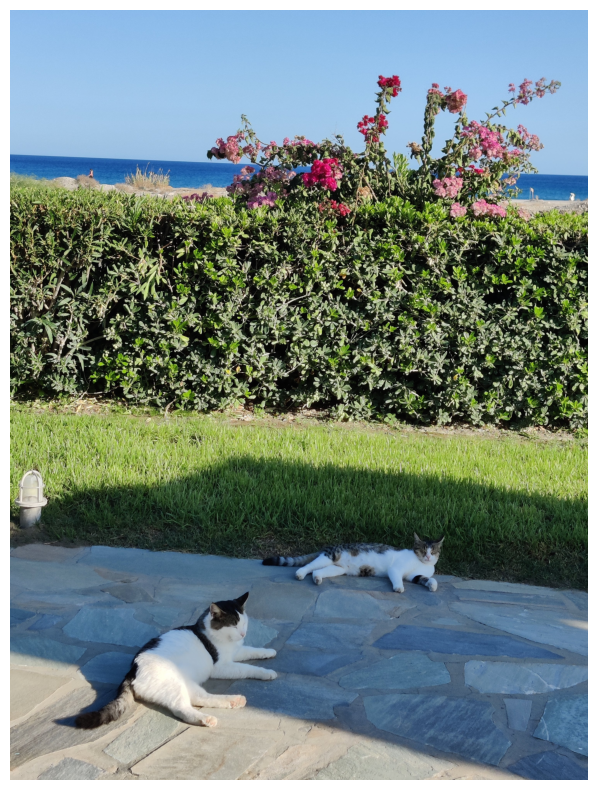

In [24]:
img = cv.imread('Katzen_Rhodos.jpg')

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.show()

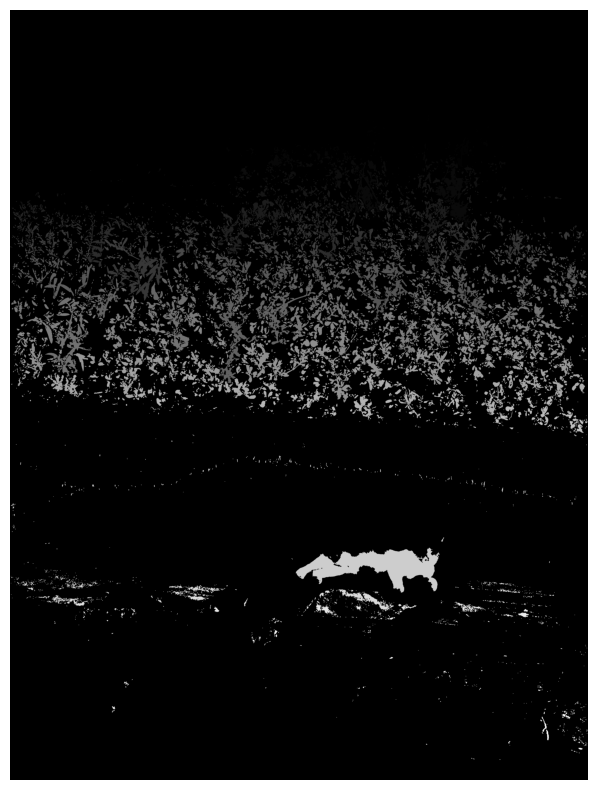

In [26]:
import numpy as np
from skimage import filters, measure, morphology
from skimage.segmentation import clear_border

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

treshhold = filters.threshold_otsu(img_gray)
binary_mask = img_gray > treshhold

cleaned_mask = clear_border(binary_mask)

eroded_mask = morphology.erosion(cleaned_mask, morphology.disk(1))
dilated_mask = morphology.dilation(eroded_mask, morphology.disk(1))
closed_mask = morphology.closing(dilated_mask, morphology.disk(1))

# Gelabelte Bild erzeugen
label_image = measure.label(closed_mask)

plt.imshow(label_image, cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.show()

Label: 1, Area: 25.0, Perimeter: 18.14213562373095
Label: 2, Area: 12.0, Perimeter: 10.485281374238571
Label: 3, Area: 832.0, Perimeter: 207.93607486307093
Label: 4, Area: 18.0, Perimeter: 13.071067811865476
Label: 5, Area: 5.0, Perimeter: 5.656854249492381
Label: 6, Area: 5.0, Perimeter: 5.656854249492381
Label: 7, Area: 5.0, Perimeter: 5.656854249492381
Label: 8, Area: 5.0, Perimeter: 5.656854249492381
Label: 9, Area: 12.0, Perimeter: 10.485281374238571
Label: 10, Area: 11.0, Perimeter: 9.071067811865476
Label: 11, Area: 19.0, Perimeter: 15.31370849898476
Label: 12, Area: 8.0, Perimeter: 7.65685424949238
Label: 13, Area: 11.0, Perimeter: 9.65685424949238
Label: 14, Area: 50.0, Perimeter: 30.384776310850235
Label: 15, Area: 5.0, Perimeter: 5.656854249492381
Label: 16, Area: 29.0, Perimeter: 19.31370849898476
Label: 17, Area: 5.0, Perimeter: 5.656854249492381
Label: 18, Area: 5.0, Perimeter: 5.656854249492381
Label: 19, Area: 24.0, Perimeter: 17.31370849898476
Label: 20, Area: 25.0, Pe

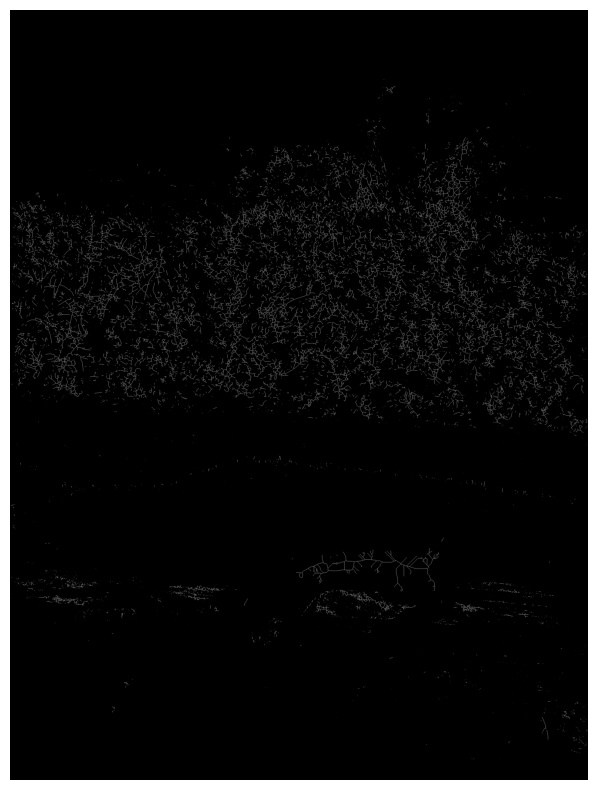

In [27]:

# Eigenschaften extrahieren
properties = measure.regionprops(label_image)

for prop in properties:
    print(f'Label: {prop.label}, Area: {prop.area}, Perimeter: {prop.perimeter}')

# Skeletonisierung eines Objekts
skeleton = morphology.skeletonize(closed_mask)
skeleton_pixel_count = np.sum(skeleton)

# Ergebnisse diskutieren
print(f'Anzahl der Pixel des Skeletons: {skeleton_pixel_count}')

plt.imshow(skeleton, cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.show()